In [37]:
import pandas as pd
import numpy as np
import scipy
import preprocessing
import analise
import spacy

from scipy import stats

#_id	title	date	text	url	craw_date	crawler
#6368	ObjectId(613e60a6160b54305a91ae1b)	Morris Chang: Foundry Father	2011-04-19	Even in the very anomalous category of tech en...	https://spectrum.ieee.org/morris-chang-foundry...	2021-09-12	IEEE Spectrum
#6158	ObjectId(613a6c8ca6c2885c65159772)	The Strange Birth and Long Life of Unix	

In [38]:
dataframe = pd.read_csv('../data/news_data_final.csv')
#dataframe = preprocessing.clean_dataset(dataframe)
dataframe.head()

_id  \
0  61073a280f87cd311d76fc6a   
1  61073a280f87cd311d76fc6b   
2  61073a280f87cd311d76fc6c   
3  61073a280f87cd311d76fc6d   
4  61073a280f87cd311d76fc6e   

                                               title        date  \
0  COVID-19 vaccines likely activate strong, last...  2021-07-06   
1          Why some horses lose the ability to sweat  2021-06-23   
2    Is climate change making allergy season longer?  2021-07-06   
3      Chestnut leaf molecule disarms staph bacteria  2021-07-06   
4  Scales show massive shark decline since prehis...  2021-07-07   

                                                text  \
0  Researchers have found evidence that the immun...   
1  For the first time, researchers have identifie...   
2  Researchers have found that changes in tempera...   
3  A molecule extracted from European chestnut tr...   
4  Shark abundance in Caribbean Panama has declin...   

                                                 url   craw_date   crawler  
0  https://www.futurity.org/how-long-does-covid-1...  2021-07-07  Futurity  
1  https://www.futurity.org/horses-sweat-chronic-...  2021-07-07  Futurity  
2  https://www.futurity.org/climate-change-allerg...  2021-07-07  Futurity  
3  https://www.futurity.org/chestnut-leaf-bacteri...  2021-07-07  Futurity  
4  https://www.futurity.org/shark-scales-fossils-...  2021-07-07  Futurity

In [4]:
dataframe.head()

_id  \
6368  ObjectId(613e60a6160b54305a91ae1b)   
6158  ObjectId(613a6c8ca6c2885c65159772)   
2228            610b10e852e223122e18a625   
1909            610945d508af52aee8b60c2b   
1081            61073a290f87cd311d7700a3   

                                                  title        date  \
6368                       Morris Chang: Foundry Father  2011-04-19   
6158            The Strange Birth and Long Life of Unix  2011-11-28   
2228                          The STEM Crisis Is a Myth  2013-08-30   
1909  London’s Crossrail Is a $21 Billion Test of Vi...  2016-03-24   
1081  Toxins from the world’s longest animal can kil...  2018-03-30   

                                                   text  \
6368  Even in the very anomalous category of tech en...   
6158  They say that when one door closes on you, ano...   
2228  You must have seen the warning a thousand time...   
1909  As the River Thames meanders eastward through ...   
1081  Bootlace worms with spooky-stretchy bodies sec...   

                                                    url   craw_date  \
6368  https://spectrum.ieee.org/morris-chang-foundry...  2021-09-12   
6158  https://spectrum.ieee.org/the-strange-birth-an...  2021-09-09   
2228  https://spectrum.ieee.org/the-stem-crisis-is-a...  2021-08-04   
1909  https://spectrum.ieee.org/londons-crossrail-is...  2021-08-03   
1081  https://www.sciencenews.org/article/toxins-boo...  2021-07-28   

            crawler  
6368  IEEE Spectrum  
6158  IEEE Spectrum  
2228  IEEE Spectrum  
1909  IEEE Spectrum  
1081   Science News

In [6]:
dataframe['text_length'] = dataframe.text.apply(lambda x: len(x))

### Recorte com desvio padrão

In [18]:
def checar_outliers(dataframe, column):
    i = 1.0
    while i <= 3:
        z_scores = stats.zscore(dataframe[column])
        abs_z_score = np.abs(z_scores)
        filtered_entries = (abs_z_score < i)
        dataframe2 = dataframe[~filtered_entries]
        dataframe3 = dataframe[filtered_entries]
        
        dataframe2 = dataframe2.sort_values(by=column)
        
        cut_value = dataframe3[column].median()
        print("Desvio padrão:", i)
        
        corte_max = dataframe2[dataframe2[column] > cut_value].iloc[0]
        print('Corte superior: ', min(dataframe2[dataframe2[column] > cut_value][column]))
        print('Url superior: ', corte_max['url'])
        
        
        if len(dataframe2[dataframe2[column] < cut_value]) > 0:
            corte_min = dataframe2[dataframe2[column] < cut_value].iloc[-1]
            print('Corte Inferior:', corte_min[column])
            print('Url Inferior:', corte_min['url'])
        else:
            print('Corte Inferior:', 0)
        i += 0.1
        print(dataframe2.shape)
        print('')
        


In [6]:
dataframe2.shape

NameError: name 'dataframe2' is not defined

In [7]:
dataframe.shape

(6777, 7)

Textos que estão sendo retirados:

In [9]:
#Tamanho a partir do qual o texto foi retirado
min(dataframe2.text_length[dataframe2.text_length > 5000])

9293

In [10]:
#Para tamanho menores do que esse o texto também seria retirada
max(dataframe2.text_length[dataframe2.text_length < 5000])

ValueError: max() arg is an empty sequence

In [ ]:
dataframe2

In [ ]:
dataframe2[dataframe2.text_length < 5000] 

No exemplo abaixo o crawler pegou apenas o primeiro parágrafo da notícia que acabou ficando incompleta.

In [ ]:
dataframe[dataframe._id == '61073a280f87cd311d76fdd1'].url.values


#### Comparação dos histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49464cbe10>]],
      dtype=object)

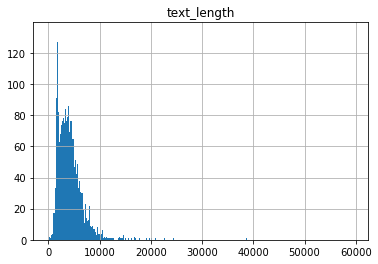

In [11]:
dataframe.hist('text_length', bins = 1000)

In [ ]:
dataframe2.hist('text_length', bins = 1000)

###  Recorte com quartil

In [ ]:
q25, q75 = np.percentile(dataframe.text_length, 25), np.percentile(dataframe.text_length, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [ ]:
lower

In [ ]:
upper

## Análise por Tokens

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
def tokenize_column(column, df):
  tokens_no_s_p = []
  tokens_no_s = []
  tokens_no_p = []
  tokens = []

  for doc in nlp.pipe(df[column].values, batch_size=50):
      if doc.is_parsed:
          tokens_no_s_p.append([token.text for token in doc if not token.is_stop and not token.is_punct])
          tokens_no_s.append([token.text for token in doc if not token.is_stop])
          tokens_no_p.append([token.text for token in doc if not token.is_punct])
          tokens.append([token.text for token in doc])     
      else:
          # We want to make sure that the lists of parsed results have the
          # same number of entries of the original Dataframe, so add some blanks in case the parse fails
          tokens_no_s_p.append(None)
          tokens_no_s.append(None)
          tokens_no_p.append(None)
          tokens.append(None)

  df[column + '_tokens_no_s_p'] = tokens_no_s_p
  df[column + '_tokens_no_s'] = tokens_no_s
  df[column + '_tokens_no_p'] = tokens_no_p
  df[column + '_tokens'] = tokens

In [10]:
tokenize_column('text', dataframe)

In [11]:

dataframe['text_wc'] = dataframe.text_tokens_no_p.apply(lambda x: len(x))

In [19]:
dataframe['text_len'] = dataframe.text.apply(lambda x: len(x))


In [4]:
dataframe

_id  \
6368  ObjectId(613e60a6160b54305a91ae1b)   
6158  ObjectId(613a6c8ca6c2885c65159772)   
2228            610b10e852e223122e18a625   
1909            610945d508af52aee8b60c2b   
1081            61073a290f87cd311d7700a3   
...                                  ...   
6770  ObjectId(614342e104dc2b673fa0ace6)   
6774  ObjectId(614342e104dc2b673fa0acea)   
6776  ObjectId(614342e104dc2b673fa0acec)   
6757  ObjectId(614342dd04dc2b673fa0acd5)   
6810  ObjectId(614343c504dc2b673fa0ad28)   

                                                  title        date  \
6368                       Morris Chang: Foundry Father  2011-04-19   
6158            The Strange Birth and Long Life of Unix  2011-11-28   
2228                          The STEM Crisis Is a Myth  2013-08-30   
1909  London’s Crossrail Is a $21 Billion Test of Vi...  2016-03-24   
1081  Toxins from the world’s longest animal can kil...  2018-03-30   
...                                                 ...         ...   
6770  Research breakthrough could protect against br...  2021-09-16   
6774  Parents, take the school holidays pressure off...  2021-09-16   
6776                      Psychosis risk linked to cats  2021-09-16   
6757  Novel combination therapy approach to keep leu...  2021-09-16   
6810  Did the coronavirus jump from animals to peopl...  2021-09-16   

                                                   text  \
6368  Even in the very anomalous category of tech en...   
6158  They say that when one door closes on you, ano...   
2228  You must have seen the warning a thousand time...   
1909  As the River Thames meanders eastward through ...   
1081  Bootlace worms with spooky-stretchy bodies sec...   
...                                                 ...   
6770  Leading scientists have identified a possible ...   
6774  If you're a parent feeling a modicum of dread ...   
6776  Exposure to toxoplasma, a disease carried by c...   
6757  In chronic leukemias, blocking the overactive ...   
6810  SARS-CoV-2, the virus that causes COVID-19, co...   

                                                    url   craw_date  \
6368  https://spectrum.ieee.org/morris-chang-foundry...  2021-09-12   
6158  https://spectrum.ieee.org/the-strange-birth-an...  2021-09-09   
2228  https://spectrum.ieee.org/the-stem-crisis-is-a...  2021-08-04   
1909  https://spectrum.ieee.org/londons-crossrail-is...  2021-08-03   
1081  https://www.sciencenews.org/article/toxins-boo...  2021-07-28   
...                                                 ...         ...   
6770  https://medicalxpress.com/news/2021-09-breakth...  2021-09-16   
6774  https://medicalxpress.com/news/2021-09-parents...  2021-09-16   
6776  https://medicalxpress.com/news/2021-09-psychos...  2021-09-16   
6757  https://www.news-medical.net/news/20210916/Nov...  2021-09-16   
6810  https://www.nature.com/articles/d41586-021-025...  2021-09-16   

             crawler  text_len  
6368   IEEE Spectrum     21324  
6158   IEEE Spectrum     19757  
2228   IEEE Spectrum     18674  
1909   IEEE Spectrum     21135  
1081    Science News      3019  
...              ...       ...  
6770  Medical Xpress      6389  
6774  Medical Xpress      3803  
6776  Medical Xpress      1584  
6757    News Medical      3838  
6810          Nature      6004  

[6743 rows x 8 columns]

In [19]:
checar_outliers(dataframe,'text_wc')

Desvio padrão: 1.0
Corte superior:  1112
Url superior:  https://medicalxpress.com/news/2021-08-leaky-bladder-problem.html
Corte Inferior: 235
Url Inferior: https://medicalxpress.com/news/2021-08-socioeconomic-characteristics-covid-mortality.html
(1100, 14)

Desvio padrão: 1.1
Corte superior:  1154
Url superior:  https://medicalxpress.com/news/2021-08-dementia.html
Corte Inferior: 192
Url Inferior: https://consumer.healthday.com/covid-19-vaccines-now-mandatory-for-california-teachers-school-staff-2654647538.html
(762, 14)

Desvio padrão: 1.2000000000000002
Corte superior:  1198
Url superior:  https://www.rdworldonline.com/rd-world-index-booster-shot-for-coronavirus-will-be-needed/
Corte Inferior: 146
Url Inferior: https://consumer.healthday.com/8-3-health-highlights-aug-3-2021-2654800103.html
(632, 14)

Desvio padrão: 1.3000000000000003
Corte superior:  1242
Url superior:  https://medicalxpress.com/news/2021-08-vaccination-gap-methods.html
Corte Inferior: 104
Url Inferior: https://medic

In [20]:
checar_outliers(dataframe,'text_len')

Desvio padrão: 1.0
Corte superior:  6915
Url superior:  https://www.medicalnewstoday.com/articles/diabetes-do-low-glycemic-index-diets-work
Corte Inferior: 1610
Url Inferior: https://consumer.healthday.com/kidney-outcomes-up-for-covid-survivors-in-post-acute-phase-2654907517.html
(1113, 9)

Desvio padrão: 1.1
Corte superior:  7178
Url superior:  https://medicalxpress.com/news/2021-09-global-dashboard-covid-vaccine-hesitancy.html
Corte Inferior: 1342
Url Inferior: https://consumer.healthday.com/despite-reopening-britain-sees-six-straight-days-of-declines-in-covid-19-cases-2654011140.html
(752, 9)

Desvio padrão: 1.2000000000000002
Corte superior:  7446
Url superior:  https://www.rdworldonline.com/rd-world-index-booster-shot-for-coronavirus-will-be-needed/
Corte Inferior: 1079
Url Inferior: https://www.nature.com/articles/d41586-021-02078-5
(573, 9)

Desvio padrão: 1.3000000000000003
Corte superior:  7709
Url superior:  https://www.sciencealert.com/ai-can-now-help-you-decide-which-career

## Análise por Crawler

In [39]:
def checar_outliers_crawler(dataframe, column):
    
    i = 3.0
    z_scores = stats.zscore(dataframe[column])
    abs_z_score = np.abs(z_scores)
    filtered_entries = (abs_z_score < i)
    dataframe2 = dataframe[~filtered_entries]
    
    dataframe = dataframe[filtered_entries]

    return dataframe.index


In [40]:
lista_index = []
for crawler in dataframe.crawler.unique():
    dataframe_crawler = dataframe[dataframe['crawler'] == crawler]
    lista_index += checar_outliers_crawler(dataframe_crawler,'text_wc').tolist()
    
dataframe_crawler = dataframe[dataframe.index.isin(lista_index)]

In [41]:
dataframe_crawler

_id  \
6368  ObjectId(613e60a6160b54305a91ae1b)   
6158  ObjectId(613a6c8ca6c2885c65159772)   
2228            610b10e852e223122e18a625   
1909            610945d508af52aee8b60c2b   
1081            61073a290f87cd311d7700a3   
...                                  ...   
6809  ObjectId(614343a904dc2b673fa0ad16)   
6745  ObjectId(61433fd704dc2b673fa0acbd)   
6747  ObjectId(614342dc04dc2b673fa0accb)   
6748  ObjectId(614342dc04dc2b673fa0accc)   
6808  ObjectId(614343a804dc2b673fa0ad15)   

                                                  title        date  \
6368                       Morris Chang: Foundry Father  2011-04-19   
6158            The Strange Birth and Long Life of Unix  2011-11-28   
2228                          The STEM Crisis Is a Myth  2013-08-30   
1909  London’s Crossrail Is a $21 Billion Test of Vi...  2016-03-24   
1081  Toxins from the world’s longest animal can kil...  2018-03-30   
...                                                 ...         ...   
6809  Hospitalizing the Unvaccinated Has Cost U.S. N...  2021-09-16   
6745  Making self-driving cars safer through keener ...  2021-09-16   
6747  Experts raise questions about routine use of s...  2021-09-16   
6748  Live oral SARS-CoV-2 vaccine provides partial ...  2021-09-16   
6808               How Effective Is Your Homemade Mask?  2021-09-16   

                                                   text  \
6368  Even in the very anomalous category of tech en...   
6158  They say that when one door closes on you, ano...   
2228  You must have seen the warning a thousand time...   
1909  As the River Thames meanders eastward through ...   
1081  Bootlace worms with spooky-stretchy bodies sec...   
...                                                 ...   
6809  THURSDAY, Sept. 16, 2021 (HealthDay News) -- T...   
6745  Aviation became a reality in the early 20th ce...   
6747  A growing number of drugs are being approved o...   
6748  Severe acute respiratory syndrome coronavirus ...   
6808  THURSDAY, Sept. 16, 2021 (HealthDay News) -- I...   

                                                    url   craw_date  \
6368  https://spectrum.ieee.org/morris-chang-foundry...  2021-09-12   
6158  https://spectrum.ieee.org/the-strange-birth-an...  2021-09-09   
2228  https://spectrum.ieee.org/the-stem-crisis-is-a...  2021-08-04   
1909  https://spectrum.ieee.org/londons-crossrail-is...  2021-08-03   
1081  https://www.sciencenews.org/article/toxins-boo...  2021-07-28   
...                                                 ...         ...   
6809  https://consumer.healthday.com/b-9-16-hospital...  2021-09-16   
6745  https://news.mit.edu/2021/heng-yang-self-drivi...  2021-09-16   
6747  https://www.news-medical.net/news/20210916/Exp...  2021-09-16   
6748  https://www.news-medical.net/news/20210916/Liv...  2021-09-16   
6808  https://consumer.healthday.com/b-9-16-how-effe...  2021-09-16   

            crawler  text_length  \
6368  IEEE Spectrum        21324   
6158  IEEE Spectrum        19757   
2228  IEEE Spectrum        18674   
1909  IEEE Spectrum        21135   
1081   Science News         3019   
...             ...          ...   
6809     Health Day         2304   
6745       MIT News         6416   
6747   News Medical         4935   
6748   News Medical         5042   
6808     Health Day         1525   

                                     text_tokens_no_s_p  \
6368  [Even, anomalous, category, tech, entrepreneur...   
6158  [They, door, closes, opens, People, generally,...   
2228  [You, seen, warning, thousand, times, Too, you...   
1909  [As, River, Thames, meanders, eastward, London...   
1081  [Bootlace, worms, spooky, stretchy, bodies, se...   
...                                                 ...   
6809  [THURSDAY, Sept., 16, 2021, HealthDay, News, T...   
6745  [Aviation, reality, early, 20th, century, took...   
6747  [A, growing, number, drugs, approved, basis, i...   
6748  [Severe, acute, respiratory, syndrome, coronav...   
6808  [THUR

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77d9a5b890>]],
      dtype=object)

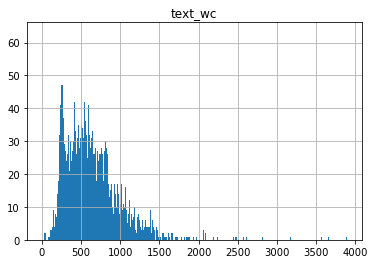

In [42]:
dataframe_crawler.hist('text_wc', bins = 1000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77d9089210>]],
      dtype=object)

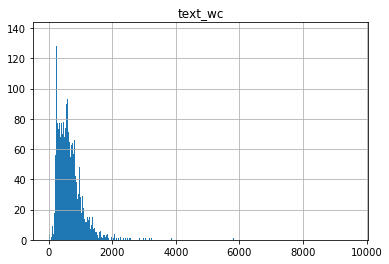

In [43]:
dataframe.hist('text_wc', bins = 1000)

In [45]:
checar_outliers(dataframe_crawler, 'text_wc')

Desvio padrão: 1.0
Corte superior:  1030
Url superior:  https://news.mit.edu/2021/smart-skin-vitals-0630
Corte Inferior: 275
Url Inferior: https://medicalxpress.com/news/2021-08-iran-covid-deaths-daily-high.html
(1686, 14)

Desvio padrão: 1.1
Corte superior:  1067
Url superior:  https://spectrum.ieee.org/wearable-health-data-standards
Corte Inferior: 237
Url Inferior: https://consumer.healthday.com/mississippi-health-system-buckles-under-astounding-rise-in-covid-19-cases-2654248525.html
(1131, 14)

Desvio padrão: 1.2000000000000002
Corte superior:  1105
Url superior:  https://news.mit.edu/2021/arlene-fiore-appointed-first-stone-professor-earth-atmospheric-planetary-sciences-0708
Corte Inferior: 200
Url Inferior: https://consumer.healthday.com/protective-factors-id-d-cut-recent-vaping-in-u-s-teens-2653937085.html
(790, 14)

Desvio padrão: 1.3000000000000003
Corte superior:  1143
Url superior:  https://www.news-medical.net/news/20210825/Higher-SARS-CoV-2-Delta-variant-transmission-among-

### Retirar os textos menores usando procentagem

In [8]:
dataframe = dataframe.sort_values(by = 'text_len')

for i in range(1, 15):
    dataframe_without_small_outliers = dataframe[dataframe.text_len > dataframe.text_len.quantile(i/1000)]
    dataframe_with_small_outliers = dataframe[dataframe.text_len < dataframe.text_len.quantile(i/1000)]
    print('Números de elementos retirados :', dataframe.shape[0] - dataframe_without_small_outliers.shape[0])
    print('Fração de corte :', i/1000)
    print('URL do corte:',dataframe_with_small_outliers.iloc[-1]['url'])
    print('Tamanho do texto cortado:',dataframe_with_small_outliers.iloc[-1]['text_len'])
    print('\n')

Números de elementos retirados : 7
Fração de corte : 0.001
URL do corte: https://www.rdworldonline.com/apeels-plant-derived-technology-is-focus-of-episode-6-of-rd-100-the-podcast/
Tamanho do texto cortado: 787


Números de elementos retirados : 14
Fração de corte : 0.002
URL do corte: https://www.news-medical.net/news/20210811/University-of-Ottawa-announces-compulsory-vaccination-for-all-students-and-staff-visiting-the-campus.aspx
Tamanho do texto cortado: 856


Números de elementos retirados : 21
Fração de corte : 0.003
URL do corte: https://consumer.healthday.com/8-3-health-highlights-aug-3-2021-2654800103.html
Tamanho do texto cortado: 886


Números de elementos retirados : 27
Fração de corte : 0.004
URL do corte: https://consumer.healthday.com/8-3-health-highlights-aug-3-2021-2654837232.html
Tamanho do texto cortado: 931


Números de elementos retirados : 34
Fração de corte : 0.005
URL do corte: https://medicalxpress.com/news/2021-08-girls-struggled-boys-covid-pandemic.html
Tamanho

## Análise de textos maiores

In [7]:
def remove_outliers_by_iqr(dataframe, crawler=None, print_text=False):
  if crawler:
    dataframe = dataframe[dataframe.crawler == crawler]
  q25, q75 = np.percentile(dataframe.text_length, 25), np.percentile(dataframe.text_length, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  dataframe = dataframe[(lower > dataframe.text_length) | (dataframe.text_length > upper)]
  print(crawler)
  print(f'lower: {lower} || upper: {upper}')
  print(dataframe.shape)
  for idx, row in dataframe.iterrows():
    print(row.url)
    if print_text:
      print(row.text, end='\n###############\n')
  print('\n==============\n')
  return dataframe

for crawler in dataframe.crawler.unique():
  remove_outliers_by_iqr(dataframe, crawler)

IEEE Spectrum
lower: -6336.75 || upper: 21379.25
(3, 8)
https://spectrum.ieee.org/inovios-electrical-device-zaps-a-covid19-vaccine-into-the-body
https://spectrum.ieee.org/how-the-ibm-pc-won-then-lost-the-personal-computer-market
https://spectrum.ieee.org/the-scandalous-history-of-the-last-rotor-cipher-machine


Science News
lower: -1884.0 || upper: 11198.0
(15, 8)
https://www.sciencenews.org/article/emmy-noether-theorem-legacy-physics-math
https://www.sciencenews.org/article/coronavirus-covid-vaccine-outreach-hispanic-communities-philadelphia
https://www.sciencenews.org/article/space-exoplanet-century-astronomy-earth-universe
https://www.sciencenews.org/article/coronavirus-covid-19-why-early-treatment-drugs
https://www.sciencenews.org/article/coronavirus-covid-music-wind-instruments-spread-transmission
https://www.sciencenews.org/article/coronavirus-covid-kids-schools-reopening-cases
https://www.sciencenews.org/article/coronavirus-covid-kids-school-return-parents-questions
https://www.

## Corte com base no percentil parametrizado

In [15]:
def remove_outliers_by_percentil(dataframe, lower = 5, upper = 5):
    #Removendo valores outliers - retira os 0.5% menores textos
    dataframe['text_len'] = dataframe.text.apply(lambda x: len(x))
    dataframe = dataframe[dataframe.text_len > dataframe.text_len.quantile(lower/1000)]
    dataframe = dataframe[dataframe.text_len < dataframe.text_len.quantile((1000-upper)/1000)]
    dataframe = dataframe.drop(columns=['text_len'])

    return dataframe

In [16]:
new_dataframe = remove_outliers_by_percentil(dataframe)

In [17]:
new_dataframe.size

53128

In [35]:
dataframe['text_len'] = dataframe.text.apply(lambda x: len(x))
dataframe4 = dataframe[dataframe.text_len < dataframe.text_len.quantile(4/1000)]

TypeError: object of type 'float' has no len()

In [32]:
dataframe4

_id  \
852             61073a280f87cd311d76ffbe   
854             61073a280f87cd311d76ffc0   
849             61073a280f87cd311d76ffbb   
1622            61073a290f87cd311d7702c0   
392             61073a280f87cd311d76fdf2   
1627            61073a290f87cd311d7702c5   
1243            61073a290f87cd311d770145   
1510            61073a290f87cd311d770250   
1899            6109456e837e2ce3f63d581a   
2558            610d6b2c293e24fe5767579e   
2095            610b10bd52e223122e18a582   
2155            610b10be52e223122e18a5be   
2860            61127a70cadb18d0812295bf   
3141            611487ceeb7fbf6ccf8f0b73   
3337            61167631143ee7229fa0733d   
3522  ObjectId(6119566204c7bfba88e91c7f)   
3759  ObjectId(611c154ffa073af1bd5b5a5f)   
4001  ObjectId(611e56ace91c67f83da7e9ce)   
4131  ObjectId(611fa84dbfc43129d7e03017)   
4706  ObjectId(61279433bab06e425f63a67e)   
4837  ObjectId(6128e5982939a73da3eea16a)   
5029  ObjectId(612cd9a30d1444821864342e)   
5876  ObjectId(6137c7d35b91a7bc94f807bb)   
6094  ObjectId(613a09643a5495b5910cefcf)   
6126  ObjectId(613a6ad2a6c2885c65159734)   
6658  ObjectId(6141f1636384314081733199)   
6561  ObjectId(6140ff4cd9662f593b63982c)   

                                                  title        date  \
852   Kim to lead human factors research at Schlesin...  2021-06-22   
854               Apollo Intelligence invests in SightX  2021-06-30   
849           Chipman joins Leger US to lead healthcare  2021-07-13   
1622  Coronapod: does England's COVID strategy risk ...  2021-07-16   
392   10 ways to keep your heart healthy in summer heat  2021-07-21   
1627  Coronapod: the latest on COVID and sporting ev...  2021-07-24   
1243                   Health Highlights: July 29, 2021  2021-07-29   
1510                   Health Highlights: July 30, 2021  2021-07-30   
1899                    Health Highlights: Aug. 3, 2021  2021-08-03   
2558       Eavesdropping on a glacier's seismic whisper  2021-08-04   
2095  Prolonged sitting linked to impaired work perf...  2021-08-04   
2155  Study links high lipid levels in early pregnan...  2021-08-04   
2860                   Health Highlights: Aug. 10, 2021  2021-08-10   
3141  University of Ottawa announces compulsory vacc...  2021-08-11   
3337   Congolese warned not to use toxic 'volcano salt'  2021-08-12   
3522  Coronapod: COVID boosters amidst global vaccin...  2021-08-13   
3759  MHRA approves use of Moderna COVID-19 vaccine ...  2021-08-17   
4001                   Health Highlights: Aug. 19, 2021  2021-08-19   
4131                   Health Highlights: Aug. 20, 2021  2021-08-20   
4706                   Health Highlights: Aug. 26, 2021  2021-08-26   
4837                   Health Highlights: Aug. 27, 2021  2021-08-27   
5029                   Health Highlights: Aug. 30, 2021  2021-08-30   
5876                 Sweden to lift most COVID measures  2021-09-07   
6094                   Health Highlights: Sept. 9, 2021  2021-09-09   
6126  New insights on sleep problems in older adults...  2021-09-09   
6658  Guidelines for supporting breastfeeding during...  2021-09-14   
6561  Apeel’s plant-derived technology is focus of E...  2021-09-14   

                                                   text  \
852   Kim (pictured) isresponsible for leading the c...   
854   Adding SightX technology to Apollo’s platform ...   
849   Chipman (pictured) specialises in research for...   
1622  The UK government has announced that virtually...   
392   Futurity is your source of research news from ...   
1627  Early in 2021 the United Kingdom, along with s...   
1243  Here's some of HealthDay's top stories for Thu...   
1510  Here's some of HealthDay's top stories for Fri...   
1899  Here's some of HealthDay's top stories for Tue...   
2558  Understanding the processes going on at the ba...   
2095  In a study published in the Journal of Occupat...   
2155  In a study in Acta Obstetricia et Gynecologica...   
2860  Here's some of HealthDay's top stories for

### Análise de texto cortados

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from sklearn.model_selection import train_test_split
from utils import remove_special_characters, clean_broke_lines, default_data_filename


In [95]:
def mitigate_dirty_data(dataframe):
    colunas = list(dataframe.columns)
    clean_dataset = dataframe.copy()
    last_value = clean_dataset['_id'][2813]

    for i in range(1,len(colunas)):
        last_value = dataframe[colunas[i]][2813]
        clean_dataset[colunas[i]][2813] = dataframe[colunas[i-1]][2813]

    clean_dataset["_id"][2813] = dataframe["_id"][2812]
    clean_dataset["title"][2813] = dataframe["title"][2812]

    return clean_dataset


def clean_dataset(dataframe):
    #Excluindo os que são vídeos e a linha contendo o texto totalmente em japonês
    index_video_data = dataframe[dataframe['text'].isna()].index.tolist()
    dataframe = dataframe.drop(index_video_data)

    #Excluindo os duplicados
    dataframe = dataframe.sort_values(by="date")
    dataframe.drop_duplicates(subset=['text'], keep='first', inplace = True)

    #Limpando dos textos ruídos contendo sintaxe de javascript
    java_noise_pattern = re.compile(r'(!function\().*(\(\);)', re.UNICODE)
    dataframe.text = dataframe.text.apply(lambda x: java_noise_pattern.sub('', x))

    #Limpando dos textos caracteres japoneses
    japanese_characters_pattern = re.compile(r'([{\u3000-\u303F}{一-龯}\p{IsHira}\p{IsKatakana}]+)', re.UNICODE)
    dataframe.text = dataframe.text.apply(lambda x: japanese_characters_pattern.sub(' ', x))

    return dataframe

In [96]:
dataframe = pd.read_csv('../data/news_data_final.csv')

dataframe = mitigate_dirty_data(dataframe)
dataframe = clean_dataset(dataframe)

In [97]:
dataframe['text_len'] = dataframe.text.apply(lambda x: len(x))
dataframe4 = dataframe[dataframe.text_len < dataframe.text_len.quantile(4/1000)]

In [98]:
dataframe4

_id  \
1161            61073a290f87cd311d7700f3   
850             61073a280f87cd311d76ffbc   
150             61073a280f87cd311d76fd00   
156             61073a280f87cd311d76fd06   
271             61073a280f87cd311d76fd79   
360             61073a280f87cd311d76fdd2   
356             61073a280f87cd311d76fdce   
354             61073a280f87cd311d76fdcc   
352             61073a280f87cd311d76fdca   
359             61073a280f87cd311d76fdd1   
448             61073a280f87cd311d76fe2a   
470             61073a280f87cd311d76fe40   
521             61073a280f87cd311d76fe73   
596             61073a280f87cd311d76febe   
1608            61073a290f87cd311d7702b2   
946             61073a290f87cd311d77001c   
993             61073a290f87cd311d77004b   
1089            61073a290f87cd311d7700ab   
1521            61073a290f87cd311d77025b   
1657            61073a290f87cd311d7702e3   
2116            610b10bd52e223122e18a597   
2790            6111e2eae0aeb0f03318c062   
3219            6115262d9d86c27a8eaa7c69   
3144            611487ceeb7fbf6ccf8f0b76   
4651  ObjectId(6126a5de1694f7fdbeaef397)   
4705  ObjectId(61279432bab06e425f63a67a)   
5224  ObjectId(612e8e36d47e720ff70253b6)   
6131  ObjectId(613a6ad3a6c2885c65159739)   

                                                  title        date  \
1161     In Photos – YDSA March for COVID Relief Checks  2021-05-13   
850   Sir Michael Marmot on the need to ‘build back ...  2021-06-21   
150      Atlas delivers faster solar simulation testing  2021-07-09   
156   50 years ago, scientists found a virus lurking...  2021-07-09   
271   Australian Beetles Walk on the Underside of Wa...  2021-07-15   
360   Study explores COVID-19 transmission risk duri...  2021-07-21   
356   Cognitive decline linked with bone loss and in...  2021-07-21   
354   Study looks into COVID-19 partial school closu...  2021-07-21   
352   Protein markers in chronic lymphocytic leukemi...  2021-07-21   
359   Less than half of the consumers find allergy i...  2021-07-21   
448   Chemotherapy drugs can induce mutations that l...  2021-07-22   
470   Aptamer Group and WuXi AppTec Research Service...  2021-07-23   
521   Covid cases surpass 40 million in Latin Americ...  2021-07-24   
596           Watch: More long covid cases seen in kids  2021-07-26   
1608  Audio long-read: How ancient people learned to...  2021-07-26   
946   Biden says US must 'do better' on COVID vaccin...  2021-07-27   
993   Video: How does sunscreen work? Can it really ...  2021-07-28   
1089  FDA issues warning letter to a company for ill...  2021-07-28   
1521  Interim recommendations for use of recombinant...  2021-07-30   
1657   Take This Refresher on Skin Safety in Summer Sun  2021-08-01   
2116  Research may lead to new insights on the genet...  2021-08-04   
2790  New research investigates the effects of Calif...  2021-08-09   
3219                        FDAが初の互換性のあるバイオシミラーインスリンを承認  2021-08-11   
3144  CDC gives a food safety alert regarding outbre...  2021-08-11   
4651  Audio long-read: why sports concussions are wo...  2021-08-25   
4705                  Covera Health raises $25m funding  2021-08-26   
5224  Safeguarding Your Heart During, After Hurrican...  2021-08-31   
6131  Biden mandates vaccine or tests for workers at...  2021-09-09   

                                                   text  \
1161                              Photos by Sammy Muñoz   
850   Commonly, I am asked what one thing Iwould rec...   
150   Atlas, maker of weathering testing technology,...   
156   A virus from human cancer — Science News , Jul...   
271   M any aquatic insects can be found gliding acr...   
360   Although in-school transmission of COVID-19 am...   
356   New research published in the Journal of Bone ...   
354   A new study published in JCPP Advances has com...   
352   Chronic lymphocytic leukemia (CLL) is the most...   
359   When researchers evaluated consumers' understa...   
448   Chemotherapy has helped make acute lymphoblas

In [99]:
dataframe5 = dataframe[dataframe.crawler == 'News Medical']

In [100]:
dataframe5 = dataframe5.sort_values(by = 'text_len')

In [101]:
dataframe5.head(20)

_id  \
1089            61073a290f87cd311d7700ab   
354             61073a280f87cd311d76fdcc   
359             61073a280f87cd311d76fdd1   
3144            611487ceeb7fbf6ccf8f0b76   
448             61073a280f87cd311d76fe2a   
1521            61073a290f87cd311d77025b   
596             61073a280f87cd311d76febe   
2790            6111e2eae0aeb0f03318c062   
352             61073a280f87cd311d76fdca   
356             61073a280f87cd311d76fdce   
360             61073a280f87cd311d76fdd2   
470             61073a280f87cd311d76fe40   
6037  ObjectId(613a085c3a5495b5910cef89)   
3759  ObjectId(611c154ffa073af1bd5b5a5f)   
3141            611487ceeb7fbf6ccf8f0b73   
5506  ObjectId(61321f5ee8a0586263580297)   
4035  ObjectId(611eb85429e8f91c7e7405f2)   
5808  ObjectId(6137655e96028905795ee460)   
4922  ObjectId(612a365cf0daf3693d9565f4)   
6034  ObjectId(613a085c3a5495b5910cef86)   

                                                  title        date  \
1089  FDA issues warning letter to a company for ill...  2021-07-28   
354   Study looks into COVID-19 partial school closu...  2021-07-21   
359   Less than half of the consumers find allergy i...  2021-07-21   
3144  CDC gives a food safety alert regarding outbre...  2021-08-11   
448   Chemotherapy drugs can induce mutations that l...  2021-07-22   
1521  Interim recommendations for use of recombinant...  2021-07-30   
596           Watch: More long covid cases seen in kids  2021-07-26   
2790  New research investigates the effects of Calif...  2021-08-09   
352   Protein markers in chronic lymphocytic leukemi...  2021-07-21   
356   Cognitive decline linked with bone loss and in...  2021-07-21   
360   Study explores COVID-19 transmission risk duri...  2021-07-21   
470   Aptamer Group and WuXi AppTec Research Service...  2021-07-23   
6037  Intimacy and passion found to be lower in rela...  2021-09-09   
3759  MHRA approves use of Moderna COVID-19 vaccine ...  2021-08-17   
3141  University of Ottawa announces compulsory vacc...  2021-08-11   
5506  Study examines the relevance of 'Patient Activ...  2021-09-03   
4035  New coating prevents bacteria from adhering to...  2021-08-19   
5808  COP26 President: Support available for quarant...  2021-09-07   
4922  Young children picked up extra weight during t...  2021-08-28   
6034  Study explores the science behind cannabis-bas...  2021-09-09   

                                                   text  \
1089  The following quote is attributed to Mitch Zel...   
354   A new study published in JCPP Advances has com...   
359   When researchers evaluated consumers' understa...   
3144  A CDC food safety alert regarding a multistate...   
448   Chemotherapy has helped make acute lymphoblast...   
1521  The interim recommendations for use of the ChA...   
596   The vast majority of the pandemic’s 4.1 millio...   
2790  New Research from the Prevention Research Cent...   
352   Chronic lymphocytic leukemia (CLL) is the most...   
356   New research published in the Journal of Bone ...   
360   Although in-school transmission of COVID-19 am...   
470   Aptamer Group Limited, the developer of Optime...   
6037  In a study of dating and married couples in In...   
3759  An extension to the current UK approval of the...   
3141  Today, the University of Ottawa announced that...   
5506  The Patient Activation Measure (PAM) is a stan...   
4035  In clinics and medical practices, it is crucia...   
5808  COP26 President-Designate Alok Sharma said: "C...   
4922  A Kaiser Permanente study of nearly 200,000 ch...   
6034  Following media reports of children with epile...   

                                                    url   craw_date  \
1089  https://www.news-medical.net/news/20210728/FDA...  2021-07-28   
354   https://www.news-medical.net/news/20210721/Stu...  2021-07-21   
359   https://www.news-medical.net/news/20210721/Les...  2021-07-21   
3144  https://www.news-medical.net/news/20210811/CDC...  2021-08-11   
448   https://www.news-me

In [103]:
dataframe6 = dataframe5[dataframe5.text_len < dataframe5.text_len.quantile(50/1000)]

In [108]:
for i in range(20):
    print('')
    print(dataframe6.iloc[i].crawler)
    print(dataframe6.iloc[i].text_len)
    print(dataframe6.iloc[i].text)
    print(dataframe6.iloc[i].url)


News Medical
102
The following quote is attributed to Mitch Zeller, J.D., director of FDA's Center for Tobacco Products
https://www.news-medical.net/news/20210728/FDA-issues-warning-letter-to-a-company-for-illegally-marketing-ENDS-products.aspx

News Medical
215
A new study published in JCPP Advances has compared the wellbeing of UK students who remained at home for schooling during the first lockdown period of the COVID-19 pandemic with those who accessed school in person.
https://www.news-medical.net/news/20210721/Study-looks-into-COVID-19-partial-school-closures-and-mental-health-problems-among-students.aspx

News Medical
220
When researchers evaluated consumers' understanding of allergy information on food labels, less than half of individuals found the information to be clear. The study, which is published in Clinical & Experimental Allergy
https://www.news-medical.net/news/20210721/Less-than-half-of-the-consumers-find-allergy-information-on-food-labels-to-be-clear.aspx

News Med

IndexError: single positional indexer is out-of-bounds

In [106]:
dataframe7 = dataframe[dataframe.text_len < dataframe.text_len.quantile(5/1000)].sort_values(by='text_len')

In [107]:
for i in range(10):
    print('')
    print(dataframe7.iloc[i].crawler)
    print(dataframe7.iloc[i].text_len)
    print(dataframe7.iloc[i].text)
    print(dataframe7.iloc[i].url)


The Bottom Line
21
Photos by Sammy Muñoz
https://thebottomline.as.ucsb.edu/2021/05/in-photos-ydsa-march-for-covid-relief-checks

News Medical
102
The following quote is attributed to Mitch Zeller, J.D., director of FDA's Center for Tobacco Products
https://www.news-medical.net/news/20210728/FDA-issues-warning-letter-to-a-company-for-illegally-marketing-ENDS-products.aspx

Medical Xpress
189
It's summer, and before you head to the beach or pool, you might slather on sunscreen. But is it doing anything beyond preventing a sunburn? Can it really prevent wrinkles and skin cancer ?
https://medicalxpress.com/news/2021-07-video-sunscreen-wrinkles-cancer.html

Health Day
195
 （FDA） 7 28 ー FDA   -yfgn Semglee ー   ー FDA ー -yfgn ー 1 2  10mL 3mL 1 1 ー ー 2010 2007   -yfgn ー FDA ー -yfgn   ー ー （HealthDay News 2021 7 29 ） https://consumer.healthday.com/fda-approves-first-...
https://consumer.healthday.com/fda-approves-first-biosimilar-insulin-product-2654638151.html

News Medical
215
A new study publ

O problema do corte do texto está acontecendo principalmente no crawler **News Medical**. Ele é o segundo com mais notícias e apenas alguns textos apresentam o problema. Um quantidade de aproximadamente 2%.


O erro acontece principalmente pois existe um flag que indica final de texto qe está no lugar errado em alguns HTMLs, sendo portanto um problema do site e não da ferramenta que você utilizaram para fazer a remoção. Os textos menores deixam esse problema bem explicito.